# Job Matching Algorithm
The following Jupyter notebook outlines an algorithm that matches job seekers to jobs based on a provided skill profile. The algorithm is run on the provided data and later run on a larger dataset for testing purposes.

To install required dependencies open a new terminal and run `pip install -r requirements.txt`

In [12]:
import time
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

## Import provided data
job_seekers = pd.read_csv('data/jobseekers.csv')
jobs = pd.read_csv('data/jobs.csv')

#### Job matching algorithm

In [13]:
def simulate_match_jobs(jobs, job_seekers, n_samples, n_iterations):
    job_values = jobs.values[:n_samples] # get first n_samples of jobs
    job_seekers_values = job_seekers.values[:n_samples] # get first n_samples of job seekers

    ## predefine skill sets for each job seeker
    job_seeker_skills_sets = [set(js[2].split(', ')) for js in job_seekers_values]

    ## predefine skill sets for each job
    job_skills_sets = [set(j[2].split(', ')) for j in job_values]

    ## allocate empty numpy array
    job_matches = np.empty((len(jobs)*len(job_seekers), 6), dtype=object)

    times = []
    for _ in range(0,n_iterations):
        start_time = time.time()

        index = 0
        for js_idx, job_seeker in enumerate(job_seekers_values):
            job_seeker_id, job_seeker_name = job_seeker[:2] # get first two items of array (seeker id and seeker name)

            for job_idx, job in enumerate(job_values):
                job_id, job_title = job[:2] # get first two items of array (job id and job title)

                matched_skills = job_seeker_skills_sets[js_idx].intersection(job_skills_sets[job_idx]) # get matched skills via set intersection
                matched_skills_percent = (len(matched_skills) / len(job_skills_sets[job_idx])) * 100

                ## format as required
                job_matches[index] = [job_seeker_id, job_seeker_name, job_id, job_title, len(matched_skills), matched_skills_percent]
                index+=1

        times.append(time.time() - start_time)

    avg_time = sum(times)/len(times)

    return [avg_time, job_matches]

#### Run on provided dataset

In [14]:
[avg_time, job_matches] = simulate_match_jobs(jobs, job_seekers, len(jobs), 1)
print("Average time taken to run: ", avg_time, " seconds.")
matched_jobs_df = pd.DataFrame(job_matches, columns=['Job Seeker ID', 'Job Seeker Name', 'Job ID', 'Job Title', 'Matching skill count', 'Matched skills percent'])
matched_jobs_df.to_csv('out/matched_jobs.csv', index=False)

Average time taken to run:  0.00011301040649414062  seconds.


#### Run on test dataset

  0%|          | 0/99 [00:00<?, ?it/s]

100%|██████████| 99/99 [00:28<00:00,  3.48it/s]


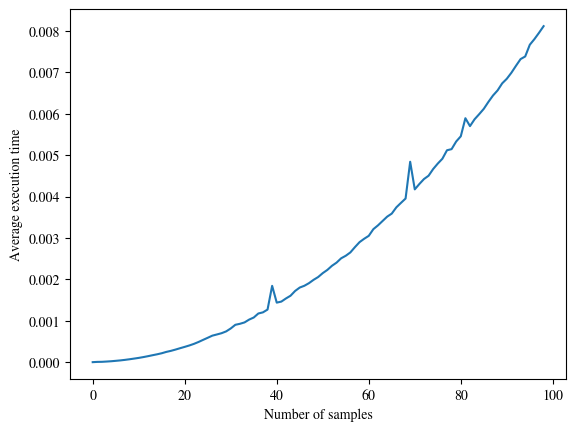

In [16]:
## import test data
job_seekers = pd.read_csv('data/jobseekers_large.csv')
jobs = pd.read_csv('data/jobs_large.csv')

## clean data
job_seekers.dropna(axis=0, inplace=True)
job_seekers.reset_index(drop=True, inplace=True)
jobs.dropna(axis=0, inplace=True)
jobs.reset_index(drop=True, inplace=True)

## run test
avg_times = []
for i in tqdm(range(1,100)):
  avg_time = simulate_match_jobs(jobs, job_seekers, i, 100)[0]
  avg_times.append(avg_time)

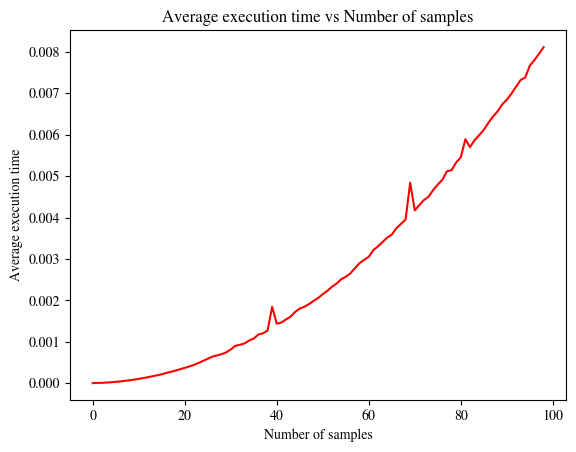

In [21]:
## plotting

plt.plot(avg_times, color="red")
plt.xlabel('Number of samples')
plt.ylabel('Average execution time')
plt.title("Average execution time vs Number of samples")

plt.savefig('plot.png', dpi=300)  # Specify the filename, extension, and dpi for the exported plot
plt.show()